In [1]:
# Install system dependencies for manimpango (text rendering)
!apt-get install -y libcairo2-dev pkg-config python3-dev libpango1.0-dev ffmpeg

# Install a compatible manimpango first (avoids build errors)
!pip install manimpango==0.5.4

# Install Manim Community
!pip install manim


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libdatrie-dev libfribidi-dev libgraphite2-dev libharfbuzz-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 libthai-dev pango1.0-tools
Suggested packages:
  libdatrie-doc libgraphite2-utils libpango1.0-doc libthai-doc graphicsmagick
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libdatrie-dev libfribidi-dev libgraphite2-dev libharfbuzz-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 libpango1.0-dev libthai

In [22]:
from manim import *

class BasicMathAnimation(Scene):
    def construct(self):
        # Judul
        title = Text("Basic Math with Manim", font_size=48)
        self.play(Write(title), run_time=3)
        self.wait(2)
        self.play(title.animate.to_edge(UP), run_time=2)

        # Step 1: Garis bilangan
        number_line = NumberLine(
            x_range=[0, 6, 1],
            length=8,
            include_numbers=True,
            color=BLUE
        ).shift(DOWN*1.5)

        self.play(Create(number_line), run_time=3)
        self.wait(1)

        # Titik awal di angka 2
        dot = Dot(color=RED).move_to(number_line.n2p(2))
        label_2 = MathTex("2").next_to(dot, UP)

        self.play(FadeIn(dot), Write(label_2), run_time=2)
        self.wait(1)

        # Lompat 3 langkah ke kanan (animasi pelan)
        for i in range(3):
            self.play(dot.animate.shift(RIGHT * number_line.unit_size), run_time=1.5)
        label_5 = MathTex("5").next_to(dot, UP)
        self.play(Write(label_5), run_time=2)
        self.wait(2)

        # Step 2: Tampilkan persamaan
        equation = MathTex("2", "+", "3", "=", "5", font_size=72)
        equation.next_to(title, DOWN*2)
        self.play(Write(equation), run_time=3)
        self.wait(2)

        # Highlight hasil
        self.play(equation[4].animate.set_color(YELLOW).scale(1.5), run_time=2)
        self.wait(3)

        # Step 3: Fungsi kuadrat
        axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[0, 10, 2],
            x_length=6,
            y_length=4,
            axis_config={"color": BLUE}
        ).shift(DOWN*1.5)

        labels = axes.get_axis_labels(x_label="x", y_label="y")
        graph = axes.plot(lambda x: x**2, color=YELLOW)
        graph_label = MathTex("y = x^2").next_to(axes, UP+RIGHT)

        self.play(Create(axes), Write(labels), run_time=3)
        self.play(Create(graph), Write(graph_label), run_time=3)
        self.wait(2)

        # Titik bergerak di kurva
        moving_dot = Dot(color=RED).move_to(axes.c2p(-3, 9))
        self.play(FadeIn(moving_dot), run_time=2)
        self.play(MoveAlongPath(moving_dot, graph), run_time=8, rate_func=linear)
        self.wait(3)


In [23]:
# Render animation (low quality preview, overwrite filename)
!manim -pql basic_math_manim.py BasicMathAnimation -o basic_math.mp4 --media_dir ./manim_output


Manim Community v0.19.0

[09/10/25 16:38:10] INFO     Animation 0 : Partial      ]8;id=480146;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=327682;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             movie file written in                              
                             '/content/manim_output/vid                         
                             eos/basic_math_manim/480p1                         
                             5/partial_movie_files/Basi                         
                             cMathAnimation/1185818338_                         
                             1864886516_223132457.mp4'                          
                    INFO     Animation 1 : Partial      ]8;id=604685;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=235128;file://

In [24]:
import glob, os, shutil

# Find the newest rendered mp4
latest = max(
    glob.glob("/content/manim_output/videos/basic_math_manim/480p15/partial_movie_files/BasicMathAnimation/*.mp4"),
    key=os.path.getmtime
)

# Ensure target folder
os.makedirs("./manim_output/final", exist_ok=True)

# Copy/rename to a stable filename
target = "./manim_output/final/basic_math.mp4"
shutil.copy(latest, target)

print("Saved to:", target)


Saved to: ./manim_output/final/basic_math.mp4


In [21]:
from IPython.display import Video
Video("/content/manim_output/final/basic_math.mp4", embed=True)


# tes


In [ ]:
%%writefile test_scene.py
from manim import *
from manim import config

class TestScene(Scene):
    def construct(self):
        # Fill the whole frame with a colored rectangle (so background isn't "black" by default)
        bg = Rectangle(width=config.frame_width, height=config.frame_height)
        bg.set_fill(BLUE, opacity=1).set_stroke(width=0)
        self.add(bg)

        # Visible text and a red dot that moves
        title = Text("TEST SCENE", font_size=96)
        title.set_color(WHITE)
        dot = Dot(radius=0.25).set_color(RED)

        self.play(FadeIn(title))
        self.play(title.animate.to_edge(UP))
        self.play(FadeIn(dot))
        # Move the dot left-to-right so we can see animation frames
        self.play(MoveAlongPath(dot, Line(LEFT*3, RIGHT*3)), run_time=3)
        self.wait(1)


Writing test_scene.py


In [ ]:
# render a single still image (no video); uses cairo renderer (safer in Colab)
!manim -pql test_scene.py TestScene -s --renderer=cairo


Manim Community v0.19.0

[09/08/25 15:05:06] INFO                                ]8;id=562552;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=689774;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                      
                             '/content/media/images/tes                         
                             t_scene/TestScene_ManimCE_                         
                             v0.19.0.png'                                       
                                                                                
                    INFO     Rendered TestScene                     ]8;id=525340;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=93424;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene.py#255\255]8;;\
                 

Showing: /content/media/images/test_scene/TestScene_ManimCE_v0.19.0.png


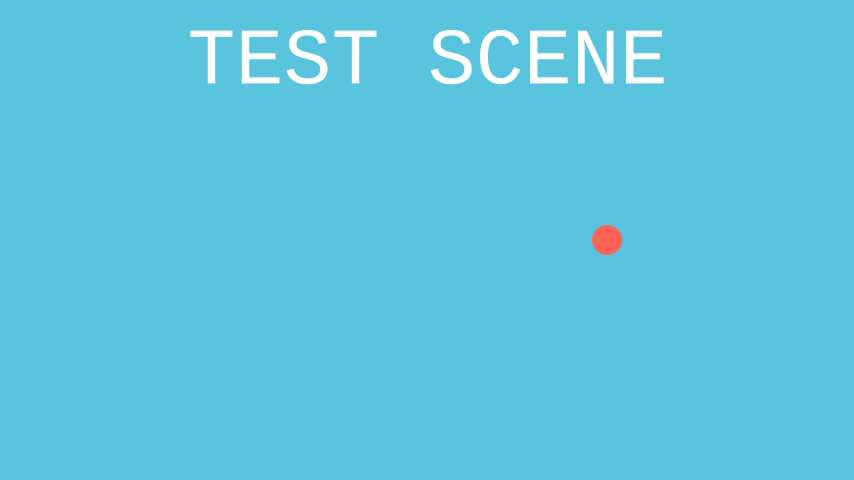

In [ ]:
# locate the most recent PNG Manim created and display it inline
import glob, os
from IPython.display import Image, display

pngs = glob.glob('/content/media/images/**/**/*.png', recursive=True)
if not pngs:
    print("No PNG found under /content/media/images — the render may have failed.")
else:
    pngs.sort(key=os.path.getmtime)
    latest = pngs[-1]
    print("Showing:", latest)
    display(Image(latest))


In [ ]:
!manim -pql test_scene.py TestScene --renderer=cairo


Manim Community v0.19.0

[09/08/25 15:06:04] INFO     Animation 0 : Partial      ]8;id=506540;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=902613;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             movie file written in                              
                             '/content/media/videos/tes                         
                             t_scene/480p15/partial_mov                         
                             ie_files/TestScene/1185818                         
                             338_2203754921_2091158742.                         
                             mp4'                                               
                    INFO     Animation 1 : Partial      ]8;id=165450;file:///usr/local/lib/python3.12/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=580482;file://

In [ ]:
from IPython.display import Video
# search for the most recent mp4
import glob, os
mp4s = glob.glob('/content/media/videos/**/*.mp4', recursive=True)
if mp4s:
    mp4s.sort(key=os.path.getmtime)
    print("Showing:", mp4s[-1])
    Video(mp4s[-1], embed=True)
else:
    print("No mp4 found in /content/media/videos — check manim render output above for errors.")


Showing: /content/media/videos/test_scene/480p15/TestScene.mp4


In [ ]:
!manim test_scene.py TestScene -v DEBUG --renderer=cairo


Manim Community v0.19.0

[09/08/25 15:07:12] DEBUG    Hashing ...                          ]8;id=357096;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py\hashing.py]8;;\:]8;id=564666;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py#352\352]8;;\
                    DEBUG    Hashing done in 0.047796 s.          ]8;id=22875;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py\hashing.py]8;;\:]8;id=863309;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py#364\364]8;;\
                    DEBUG    Hash generated :                     ]8;id=516481;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py\hashing.py]8;;\:]8;id=636679;file:///usr/local/lib/python3.12/dist-packages/manim/utils/hashing.py#367\367]8;;\
                             3977891868_2203754921_2091158742                   
                    DEBUG    List of the first few          ]8;id=185847;file:///usr/lo

# tes 2

In [ ]:
!manim -pql test_scene.py TestScene --format=gif --renderer=cairo


Manim Community v0.19.0

[09/08/25 15:10:16] INFO     Animation 0 : Using cached     ]8;id=183799;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=286930;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             data (hash :                                       
                             1185818338_2203754921_20911587                     
                             42)                                                
                    INFO     Animation 1 : Using cached     ]8;id=169185;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=255063;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             data (hash :                                       
                             624642324_3767907060_875696657                

Showing: /content/media/videos/test_scene/480p15/TestScene_ManimCE_v0.19.0.gif


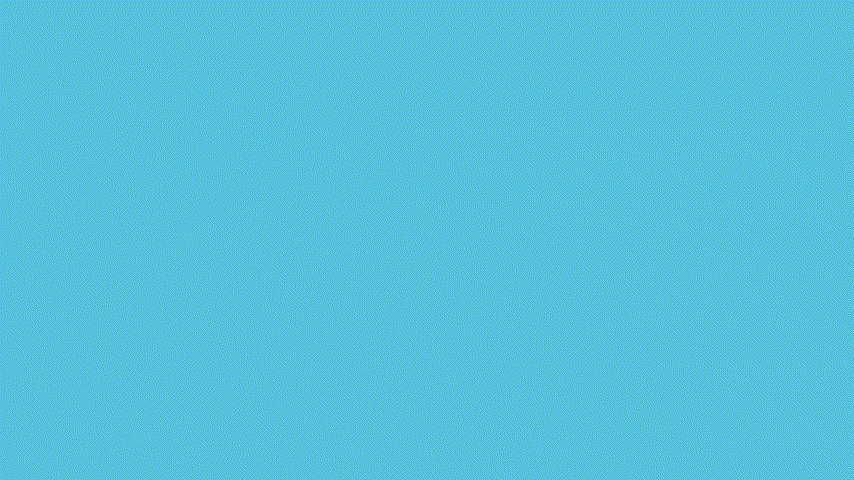

In [ ]:
import glob, os
from IPython.display import Image

gifs = glob.glob('/content/media/videos/**/*.gif', recursive=True)
gifs.sort(key=os.path.getmtime)
print("Showing:", gifs[-1])
Image(filename=gifs[-1])


# tes 3

In [ ]:
!manim -pql test_scene.py TestScene --renderer=cairo --format=mp4 --codec=h264


Manim Community v0.19.0

Usage: manim render [OPTIONS] FILE [SCENE_NAMES]...
Try 'manim render --help' for help.

Error: No such option: --codec


In [ ]:
from IPython.display import Video
Video("/content/media/videos/test_scene/480p15/TestScene.mp4", embed=True)


# final gif

In [ ]:
%%writefile basic_math_manim.py
from manim import *

class BasicMathAnimation(Scene):
    def construct(self):
        title = Text("Basic Math with Manim", font_size=48)
        self.play(Write(title))
        self.play(title.animate.to_edge(UP))

        equation = MathTex("2", "+", "3", "=", "5", font_size=72)
        self.play(Write(equation))
        self.play(equation[4].animate.set_color(YELLOW).scale(1.2))
        self.wait(1)
        self.play(FadeOut(equation))

        axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[0, 9, 1],
            x_length=6,
            y_length=4,
            axis_config={"color": BLUE}
        ).shift(DOWN*1)

        labels = axes.get_axis_labels(x_label="x", y_label="y")
        graph = axes.plot(lambda x: x**2, color=YELLOW)
        graph_label = MathTex("y = x^2").next_to(graph, UP + RIGHT)

        self.play(Create(axes), Write(labels))
        self.play(Create(graph), Write(graph_label))

        dot = Dot(color=RED).move_to(axes.c2p(-3, 9))
        self.play(FadeIn(dot))
        self.play(MoveAlongPath(dot, graph), run_time=3, rate_func=linear)
        self.wait(1)


Overwriting basic_math_manim.py


In [ ]:
!manim -pql /content/basic_math_manim.py BasicMathAnimation --format=gif --renderer=cairo


Manim Community v0.19.0

[09/08/25 15:18:22] INFO     Animation 0 : Using cached     ]8;id=370292;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=570772;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             data (hash :                                       
                             1185818338_1864886516_22313245                     
                             7)                                                 
[09/08/25 15:18:23] INFO     Animation 1 : Using cached     ]8;id=732996;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=375708;file:///usr/local/lib/python3.12/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             data (hash :                                       
                             624642324_952797971_998865172)                

In [ ]:
import glob, os
from IPython.display import Image

gifs = glob.glob('/content/basic_math_manim/**/*.gif', recursive=True)
gifs.sort(key=os.path.getmtime)
print("Showing:", gifs[-1])
Image(filename=gifs[-1])


IndexError: list index out of range